In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import scipy.stats as stats
from scipy.stats import linregress

## Reading in multiple csv files to merge

In [3]:
# read cleaned us vax info
clean_vax_df= pd.read_csv ('../data/5CLEAN_covid19_vaccinations_in_us.csv')
clean_vax_df.head(52)

,State,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,Residents 12+ with at least one dose,Residents 12+ with a completed primary series,Residents 5+ with at least one dose,Residents 5+ with a completed primary series
0,Alaska,2176065,1328221,535718,73.2,418608,90909,81999,504958,452885,530318,474707
1,Alabama,12349530,7018011,3193141,65.1,2416344,840073,725159,3107922,2554026,3183544,2607644
2,Arkansas,8373210,4874091,2115165,70.1,1547724,524198,440981,2031772,1661645,2104099,1715538
3,Arizona,19959120,14647405,5704677,78.4,4239941,1348446,1188267,5394242,4596164,5663049,4805903
4,California,121107865,88487852,33613401,85.1,25681179,6058090,5441414,31630858,27956563,33267856,29371810
5,Colorado,17769135,13033446,4837792,84.0,3729317,902546,818078,4549073,4023663,4776300,4215139
6,Connecticut,11881825,9040989,3670090,95.0,2602449,823664,654355,3481915,2816633,3640198,2948721
7,Delaware,3352025,2169125,861811,88.5,641112,225182,193640,823076,686257,856096,713143
8,Florida,61526685,42267369,17810446,82.9,13732833,4944364,4244393,17285242,14571195,17757764,14946304
9,Georgia,28727475,17124791,7287758,68.6,5494615,1494072,1315992,6998957,5894565,7248684,6085428


In [4]:
# read cleaned us pop
clean_st_pop_df= pd.read_csv ('../data/CLEAN_regionpopulation.csv')
clean_st_pop_df.head(50)

,State,2022 Population Estimate,Region
0,Connecticut,3626205,Northeast
1,Maine,1385340,Northeast
2,Massachusetts,6981974,Northeast
3,New Hampshire,1395231,Northeast
4,New Jersey,9261699,Northeast
5,New York,19677151,Northeast
6,Pennsylvania,12972008,Northeast
7,Rhode Island,1093734,Northeast
8,Vermont,647064,Northeast
9,Illinois,12582032,Midwest


In [5]:
# read cleaned covid deaths
clean_cov_death_df= pd.read_csv ('../data/CLEAN_FINAL2_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')
clean_cov_death_df.head(50)

,Data As Of,State,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,09/27/2023,Alabama,01/01/2020,09/23/2023,All Sexes,All Ages,21520.0,231602.0,7411.0
1,09/27/2023,Alaska,01/01/2020,09/23/2023,All Sexes,All Ages,1492.0,20039.0,813.0
2,09/27/2023,Arizona,01/01/2020,09/23/2023,All Sexes,All Ages,30307.0,284393.0,17435.0
3,09/27/2023,Arkansas,01/01/2020,09/23/2023,All Sexes,All Ages,12663.0,140174.0,6060.0
4,09/27/2023,California,01/01/2020,09/23/2023,All Sexes,All Ages,109248.0,1178346.0,62152.0
5,09/27/2023,Colorado,01/01/2020,09/23/2023,All Sexes,All Ages,15378.0,176094.0,7850.0
6,09/27/2023,Connecticut,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
7,09/27/2023,Delaware,01/01/2020,09/23/2023,All Sexes,All Ages,3445.0,41037.0,1683.0
8,09/27/2023,Florida,01/01/2020,09/23/2023,All Sexes,All Ages,81894.0,915140.0,50161.0
9,09/27/2023,Georgia,01/01/2020,09/23/2023,All Sexes,All Ages,36499.0,384074.0,18689.0


* Merge US population data with vaccination data

In [6]:
merge_vax_pop_df = pd.merge(clean_st_pop_df, clean_vax_df, on="State")
merge_vax_pop_df.head()

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,Residents 12+ with at least one dose,Residents 12+ with a completed primary series,Residents 5+ with at least one dose,Residents 5+ with a completed primary series
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,3481915,2816633,3640198,2948721
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,1252248,1070587,1303033,1116192
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,6947787,5480791,7306432,5770765
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,1152503,946332,1194903,977652
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,8011957,6701732,8374653,7008596


* Merge Population/Vaccination data with COVID-19 data

In [7]:
# merge with deaths csv
merge_all_df = pd.merge(merge_vax_pop_df, clean_cov_death_df, on = "State")
merge_all_df.head(50)

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,...,1303033,1116192,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3235.0,61645.0,872.0
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,...,1194903,977652,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3112.0,51581.0,1155.0
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
5,New York,19677151,Northeast,61302975,45177512,18427712,94.7,14013838,3630599,3195894,...,18297040,15686124,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,80440.0,667846.0,31870.0
6,Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
7,Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0
8,Vermont,647064,Northeast,2588940,1762563,623937,95.0,467865,151804,133976,...,614499,531036,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,976.0,23816.0,321.0
9,Illinois,12582032,Midwest,38328915,26859342,10036899,79.2,7874806,2011136,1865350,...,9928857,8988132,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,38724.0,446027.0,19882.0


* Write merged data to new csv file

In [8]:
merge_all_df.to_csv("../data/1CLEAN_merged_all.csv", index = False)

## Start analysis

In [9]:
merge_all_df.set_index("State")

,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,Residents 12+ with at least one dose,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
State,,,,,,,,,,,,,,,,,,,,,
Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,3481915,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,1252248,...,1303033,1116192,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3235.0,61645.0,872.0
Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,6947787,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,1152503,...,1194903,977652,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3112.0,51581.0,1155.0
New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,8011957,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
New York,19677151,Northeast,61302975,45177512,18427712,94.7,14013838,3630599,3195894,17549952,...,18297040,15686124,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,80440.0,667846.0,31870.0
Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,11109272,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,1065257,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0
Vermont,647064,Northeast,2588940,1762563,623937,95.0,467865,151804,133976,582633,...,614499,531036,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,976.0,23816.0,321.0


#### ALL

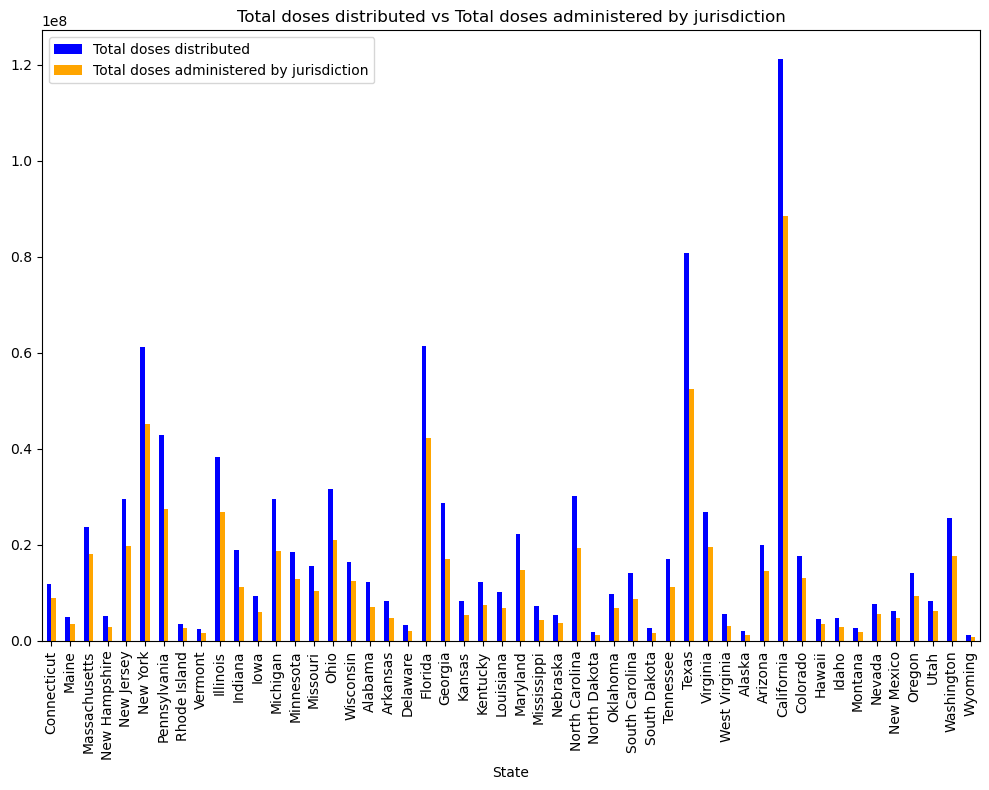

In [17]:
## bar chart of Total doses distributed vs Total doses administered by jurisdiction
ax = merge_all_df.plot(kind='bar', figsize=(10,8), x='State', y=['Total doses distributed', 'Total doses administered by jurisdiction'], 
                       rot=90, color=['blue', 'orange'])
plt.title("Total doses distributed vs Total doses administered by jurisdiction")
plt.tight_layout()

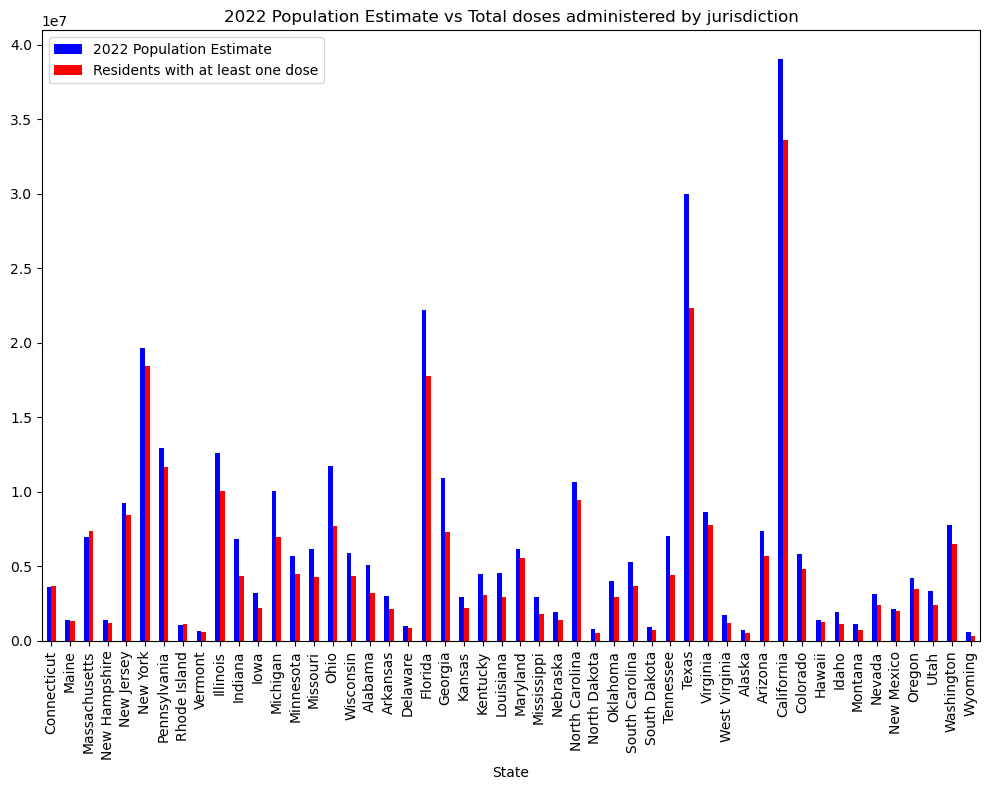

In [45]:
## bar chart of 2022 Population Estimate vs Total doses administered by jurisdiction
ax = merge_all_df.plot(kind='bar', figsize=(10,8), x='State', y=['2022 Population Estimate','Residents with at least one dose'], 
                                                                rot=90, color=['blue','red'])
plt.title("2022 Population Estimate vs Total doses administered by jurisdiction")
plt.tight_layout()

#### Analysis of chart above 2022 Population Estimate vs Total doses administered by jurisdiction
#### 3 states have administered at least one more than the entire population
#### In Dec. 2021, the CDC capped vaccination estimates to 95% to account for accuracy differences in vaccination coverage estimates between jurisdictions.
#### https://usafacts.org/visualizations/covid-vaccine-tracker-states/state/connecticut/

#### Quartiles for all states

In [20]:
# Population - All states quartile calculations - 4 outliers (NY/CA/FL/TX)
all_pop = merge_all_df["2022 Population Estimate"] 
quartiles = all_pop.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of All states is: {lowerq}")
print(f"The upper quartile of All states is: {upperq}")
print(f"The interquartile range of All states is: {iqr}")
print(f"The the median of All states is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outliers = all_pop[(all_pop>upper_bound) | (all_pop<lower_bound)]

if len(outliers) > 0:
    print(f"All states's potential outliers:{outliers}")

The lower quartile of All states is: 1946255.5
The upper quartile of All states is: 7679138.75
The interquartile range of All states is: 5732883.25
The the median of All states is: 4551275.5 
Values below -6653069.375 could be outliers.
Values above 16278463.625 could be outliers.
All states's potential outliers:5     19677151
20    22244823
34    30029572
39    39029342
Name: 2022 Population Estimate, dtype: int64


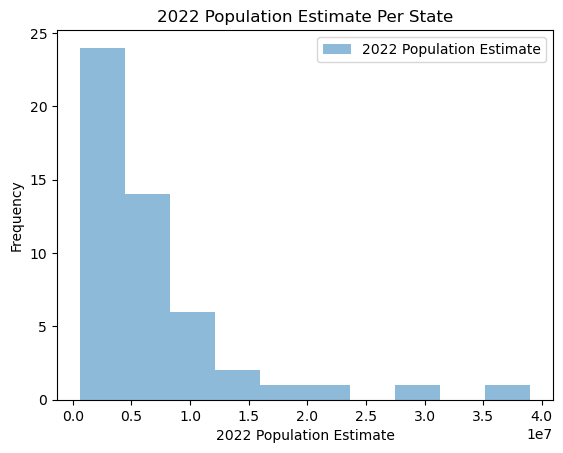

In [21]:
# Histogram of all states
merge_all_df['2022 Population Estimate'].plot(kind='hist', bins = 10, alpha=0.5, legend=True)
plt.title('2022 Population Estimate Per State')
plt.xlabel('2022 Population Estimate')
# plt.ylabel('2022 Population Estimate')
plt.show()

In [22]:
total_pop = merge_all_df["2022 Population Estimate"].sum()
total_pop

332615754

In [23]:
#All states Variance and Standard deviation
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(merge_all_df["2022 Population Estimate"],ddof = 0) # dof degrees of freedom
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(merge_all_df["2022 Population Estimate"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 54407169506007.56
The population standard deviation using the NumPy module is 7376121.576140646


### Remove outlier states

In [24]:
# remove outliers (NY/CA/TX/FL) new df
ROL_to_all_df = merge_all_df.drop([5,20,34,39], axis=0)
ROL_to_all_df.head(50)

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,...,1303033,1116192,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3235.0,61645.0,872.0
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,...,1194903,977652,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3112.0,51581.0,1155.0
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
6,Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
7,Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0
8,Vermont,647064,Northeast,2588940,1762563,623937,95.0,467865,151804,133976,...,614499,531036,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,976.0,23816.0,321.0
9,Illinois,12582032,Midwest,38328915,26859342,10036899,79.2,7874806,2011136,1865350,...,9928857,8988132,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,38724.0,446027.0,19882.0
10,Indiana,6833037,Midwest,18989660,11201087,4350210,64.6,3511518,1046568,976073,...,4321434,3886503,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,26885.0,282262.0,13954.0


In [25]:
# check rows for outliers were removed
ROL_to_all_df.shape

(46, 22)

### Histogram for remaining states

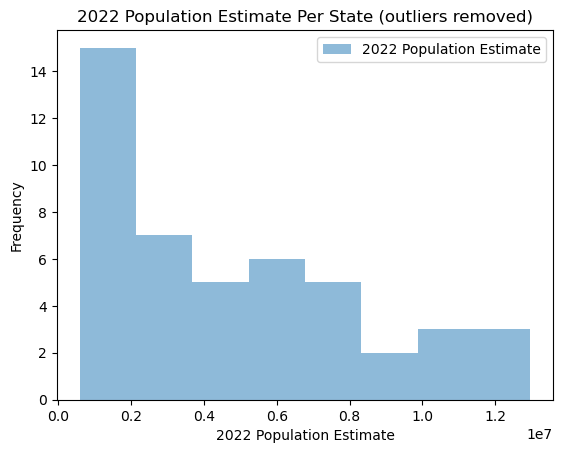

In [26]:
# removed outliers histogram
ROL_to_all_df['2022 Population Estimate'].plot(kind='hist', bins=8, alpha=0.5, legend=True)
plt.title('2022 Population Estimate Per State (outliers removed)')
plt.xlabel('2022 Population Estimate')
plt.show()

In [27]:
#All states Variance and Standard deviation - outliers removed
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(ROL_to_all_df["2022 Population Estimate"],ddof = 0) # dof degrees of freedom
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(ROL_to_all_df["2022 Population Estimate"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 12131875053153.146
The population standard deviation using the NumPy module is 3483084.1294968957


### Quartiles of remaining states (removed outliers)

In [28]:
# Population - removed outliers states quartile calculations NO outliers (no -> NY/CA/FL/TX)
ROL_pop = ROL_to_all_df["2022 Population Estimate"] 
quartiles = ROL_pop.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ROL All states is: {lowerq}")
print(f"The upper quartile of ROL All states is: {upperq}")
print(f"The interquartile range of ROL All states is: {iqr}")
print(f"The the median of ROL All states is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outliers = ROL_pop[(ROL_pop>upper_bound) | (ROL_pop<lower_bound)]

if len(outliers) > 0:
    print(f"ROL All states's potential outliers:{outliers}")

The lower quartile of ROL All states is: 1816125.25
The upper quartile of ROL All states is: 6944739.75
The interquartile range of ROL All states is: 5128614.5
The the median of ROL All states is: 4129968.5 
Values below -5876796.5 could be outliers.
Values above 14637661.5 could be outliers.


### Outlier state new Dataframe - XL States

In [29]:
XL_state_rows = merge_all_df.loc[merge_all_df["2022 Population Estimate"] >= 19677151]
XL_state_rows

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
5,New York,19677151,Northeast,61302975,45177512,18427712,94.7,14013838,3630599,3195894,...,18297040,15686124,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,80440.0,667846.0,31870.0
20,Florida,22244823,South,61526685,42267369,17810446,82.9,13732833,4944364,4244393,...,17757764,14946304,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,81894.0,915140.0,50161.0
34,Texas,30029572,South,80813315,52510128,22322586,77.0,16008968,3756924,3330121,...,22160914,18363854,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,104421.0,931558.0,58265.0
39,California,39029342,West,121107865,88487852,33613401,85.1,25681179,6058090,5441414,...,33267856,29371810,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,109248.0,1178346.0,62152.0


In [30]:
#XL states variance and standard deviation
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(XL_state_rows["2022 Population Estimate"],ddof = 0) # dof degrees of freedom
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(XL_state_rows["2022 Population Estimate"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 56974444479285.5
The population standard deviation using the NumPy module is 7548141.78982387


In [31]:
#write new csv file for XL states
XL_state_rows.to_csv("../data/1XL_state_rows.csv", index = False)

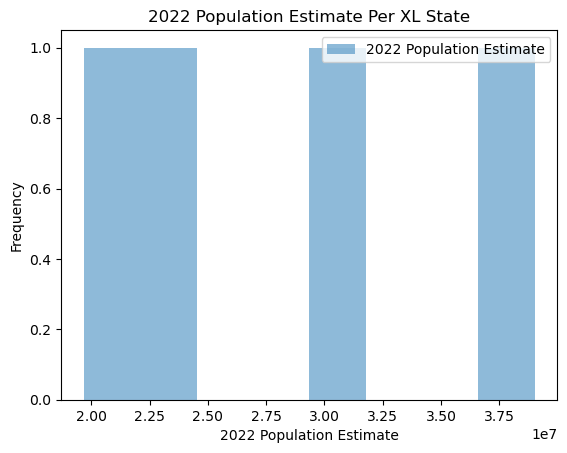

In [32]:
#Outlier states histogram
XL_state_rows['2022 Population Estimate'].plot(kind='hist', bins = 8, alpha=0.5, legend=True)
plt.title('2022 Population Estimate Per XL State')
plt.xlabel('2022 Population Estimate')
# plt.ylabel('2022 Population Estimate')
plt.show()

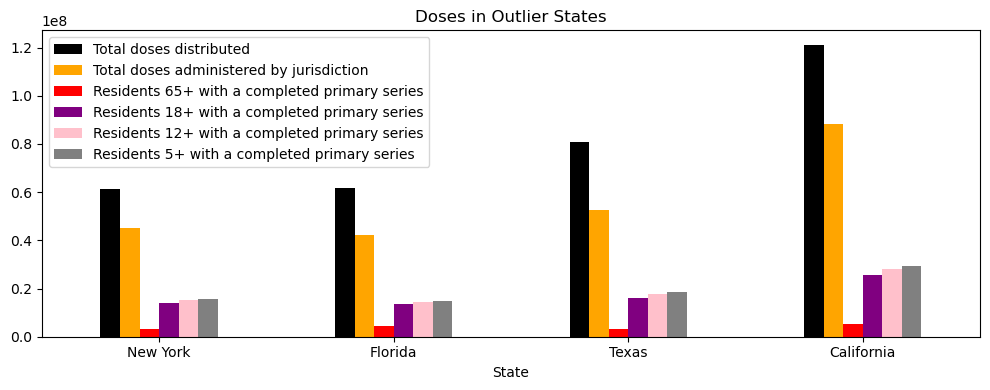

In [33]:
ax = XL_state_rows.plot(kind='bar', figsize=(10,4), x='State', y=['Total doses distributed', 
                                                                  'Total doses administered by jurisdiction',
                                                                 'Residents 65+ with a completed primary series', 
                                                                 'Residents 18+ with a completed primary series', 
                                                                 'Residents 12+ with a completed primary series', 
                                                                 'Residents 5+ with a completed primary series'], 
                                                                 rot=0, color=['black', 'orange', 'red','purple', 'pink', "gray"])
plt.title("Doses in Outlier States")
# plt.ylabel()
plt.tight_layout()

### TOP 75% of USA population Dataframe [upper quartile] - outliers states excluded

In [34]:
#largest states only population < 19,677,151 & > 6944739 [threshold for upper quartile] TOP 75% of USA population -->>>(with XL removed)
large_st_rows = merge_all_df.loc[(merge_all_df["2022 Population Estimate"] < 19677151) & (merge_all_df["2022 Population Estimate"] > 6944739)]
large_st_rows

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
6,Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
9,Illinois,12582032,Midwest,38328915,26859342,10036899,79.2,7874806,2011136,1865350,...,9928857,8988132,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,38724.0,446027.0,19882.0
12,Michigan,10034113,Midwest,29638290,18769116,6979192,69.9,5615530,1756102,1615024,...,6921128,6221234,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,37102.0,412252.0,18475.0
15,Ohio,11756058,Midwest,31703485,21104771,7707458,65.9,6367505,1939194,1834185,...,7639577,7048249,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,49729.0,517794.0,24089.0
21,Georgia,10912876,South,28727475,17124791,7287758,68.6,5494615,1494072,1315992,...,7248684,6085428,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,36499.0,384074.0,18689.0
28,North Carolina,10698973,South,30278310,19434544,9456334,90.2,6316324,2366178,1811611,...,9392711,6987602,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,34383.0,417304.0,18048.0
33,Tennessee,7051339,South,17172490,11323319,4413541,64.6,3528315,1082135,992506,...,4391102,3843432,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,30408.0,330056.0,15597.0
35,Virginia,8683619,South,26823665,19608172,7794449,91.3,5701220,1565047,1329147,...,7712390,6507230,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,23148.0,301033.0,9805.0


In [39]:
large_st_rows["State"].unique()

array(['Massachusetts', 'New Jersey', 'Pennsylvania', 'Illinois',
       'Michigan', 'Ohio', 'Georgia', 'North Carolina', 'Tennessee',
       'Virginia', 'Arizona', 'Washington'], dtype=object)

In [40]:
#largest states variance and standard deviation
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(large_st_rows["2022 Population Estimate"],ddof = 0) # dof degrees of freedom
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(large_st_rows["2022 Population Estimate"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 4215283147536.139
The population standard deviation using the NumPy module is 2053115.4735026814


In [41]:
# write new csv file for dataframe for Large states only
large_st_rows.to_csv("../data/1large_state_rows.csv", index = False)

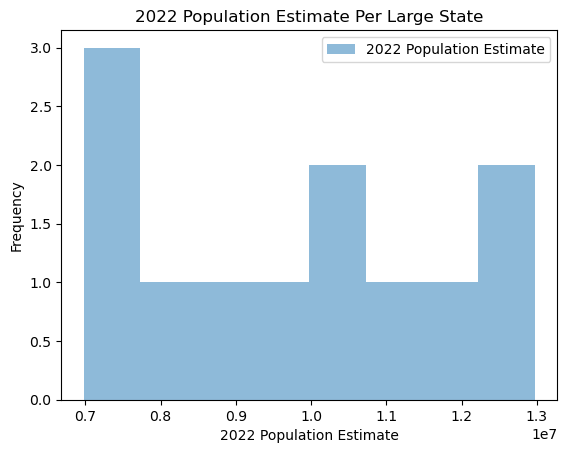

In [42]:
#Large states histogram
large_st_rows['2022 Population Estimate'].plot(kind='hist', bins = 8, alpha=0.5, legend=True)
plt.title('2022 Population Estimate Per Large State')
plt.xlabel('2022 Population Estimate')
plt.show()

### 50% of USA population Dataframe [interquartile] - outliers states excluded